# Задачи к Лекции 1

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [1]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns

z = zipfile.ZipFile("../data/athlete_events.zip")
df = pd.read_csv(z.open("athlete_events.csv"))
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


**Получение различной информации**

In [2]:
df.shape

(30181, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [4]:
df.describe()

,ID,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

In [3]:
pd.crosstab(df['Sex'], df['Medal'], margins = 1)

Medal,Bronze,Gold,Silver,All
Sex,,,,
F,3475,3437,3438,10350
M,6673,6730,6428,19831
All,10148,10167,9866,30181


**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [6]:
df[df['Medal'] == 'Gold']['NOC'].value_counts().head(1)

USA    2115
Name: NOC, dtype: int64

**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

In [4]:
pd.crosstab(df['Sport'], df['Sex'])

Sex,F,M
Sport,,
Alpine Skiing,180,174
Archery,100,106
Art Competitions,0,2
Athletics,1239,2409
Badminton,73,81
Baseball,0,333
Basketball,390,610
Beach Volleyball,35,33
Biathlon,147,241


**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

In [31]:
df[(df['Sex'] == 'F') & (df['Sport'] == 'Ice Hockey')]['Age'].agg([np.mean, np.std])

mean    24.420000
std      4.360464
Name: Age, dtype: float64

**5. У какой страны больше всего было больше всего женщин, получивших бронзовую медаль?**

In [5]:
df[(df['Sex'] == 'F') & (df['Medal'] == 'Bronze')]['Team'].value_counts().head(1)

United States    360
Name: Team, dtype: int64

**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

<AxesSubplot:xlabel='NOC'>

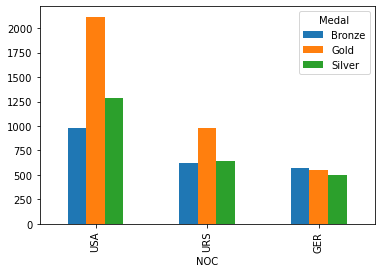

In [4]:
pd.crosstab(df['NOC'],df['Medal']).nlargest(3,df['Medal']).plot.bar()

**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль(density или distplot)**

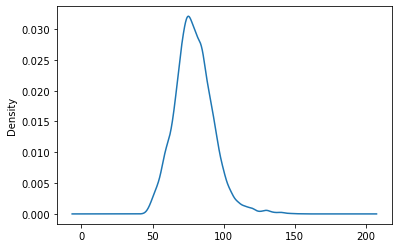

In [6]:
df[(df['Sex'] == 'M') & (df['Medal'] == 'Silver')]['Weight'].plot(kind='density');

**8. Постройте boxplot для возраста участника в зависимости от медали**

<AxesSubplot:xlabel='Age', ylabel='Medal'>

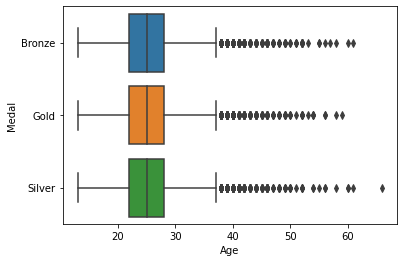

In [16]:
sns.boxplot(y = "Medal", x = "Age",
           data = df, orient = "h")

**9. Постройте pairplot для веса, возраста и роста участников от USA.**

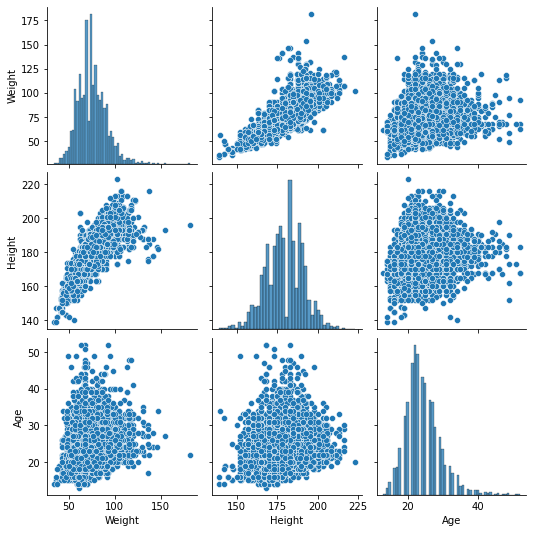

In [4]:
sns.pairplot(df[df['NOC']=='USA'][['Weight','Height','Age']])